In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pyedflib

import os
import sys
sys.path.append('..')

RECS_DIR = '../resources/datasets/mass/register'

from sleeprnn.data import utils
from sleeprnn.common import viz

viz.notebook_full_width()

## Load MASS Data

In [2]:
subject_id = 1

channel = 'EEG C3-CLE'
path_eeg_file = os.path.join(RECS_DIR, '01-02-%04d PSG.edf' % subject_id)

with pyedflib.EdfReader(path_eeg_file) as file:
    channel_names = file.getSignalLabels()
    channel_to_extract = channel_names.index(channel)
    signal = file.readSignal(channel_to_extract)
    fs_old = file.samplefrequency(channel_to_extract)
    # Check
    print('Channel extracted: %s' % file.getLabel(channel_to_extract))

# Particular fix for mass dataset:
fs_old_round = int(np.round(fs_old))
# Transform the original fs frequency with decimals to rounded version
signal = utils.resample_signal_linear(signal, fs_old=fs_old, fs_new=fs_old_round)

Channel extracted: EEG C3-CLE


In [4]:
signal_256_raw = signal.copy()
signal_256_filtered = utils.broad_filter(signal, fs_old_round)
signal_200 = utils.resample_signal(signal_256_filtered, fs_old=fs_old_round, fs_new=200)
signal_128 = utils.resample_signal(signal_256_filtered, fs_old=fs_old_round, fs_new=128)

signals_dict = {
    'Raw 256 Hz': signal_256_raw,
    'Filtered 256 Hz': signal_256_filtered,
    'Subsampled 200 Hz': signal_200,
    'Subsampled 128 Hz': signal_128
}

fs_dict = {
    'Raw 256 Hz': 256,
    'Filtered 256 Hz': 256,
    'Subsampled 200 Hz': 200,
    'Subsampled 128 Hz': 128
}

## Comparison between different subsamplings and filtering

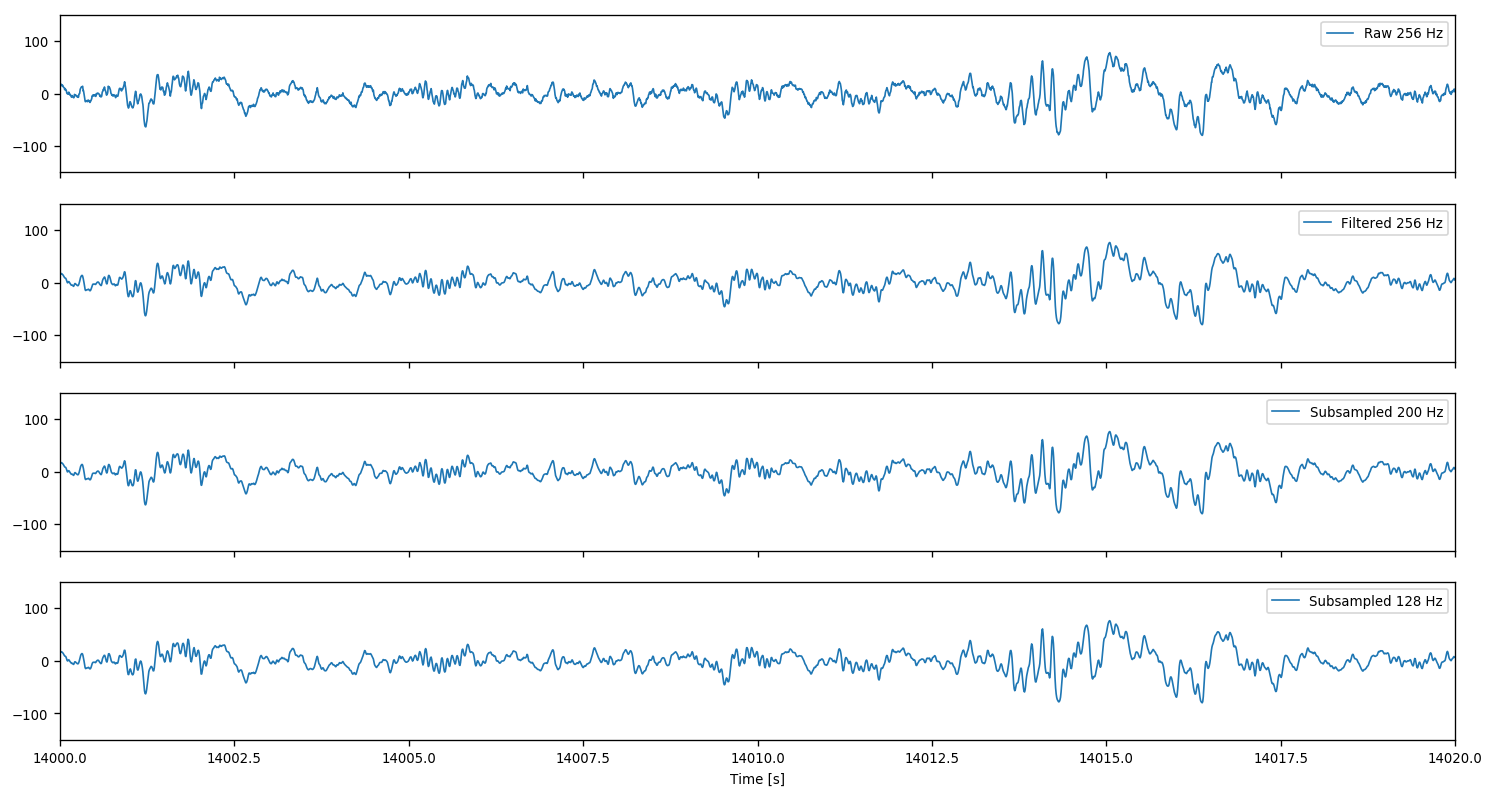

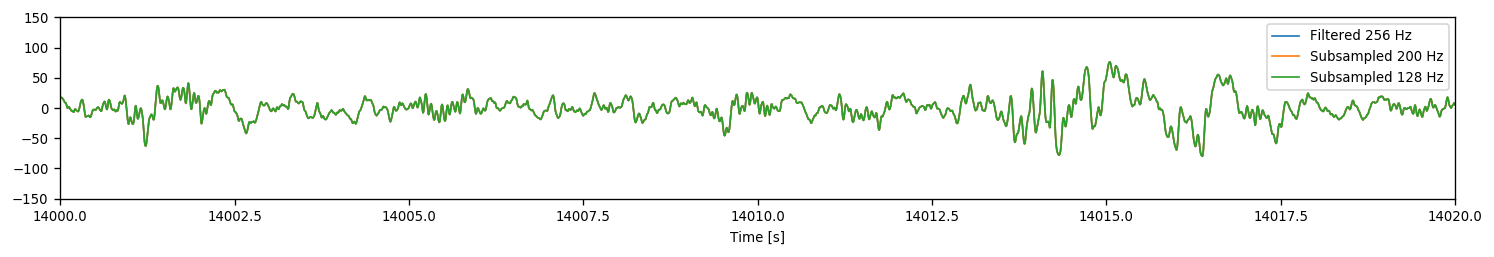

In [31]:
segment_idx = 700
segment_size = 20

fig, ax = plt.subplots(4, 1, figsize=(15, 8), dpi=120, sharex=True, sharey=True)

for i, key in enumerate(signals_dict):
    start_time = segment_idx * segment_size
    start_sample = int(start_time * fs_dict[key])
    end_sample = int(start_sample + segment_size * fs_dict[key])
    time_axis = np.arange(start_sample, end_sample) / fs_dict[key]
    segment_signal = signals_dict[key][start_sample:end_sample]
    ax[i].plot(time_axis, segment_signal, label=key, linewidth=1)
    ax[i].set_ylim([-150, 150])
    ax[i].set_xlim([start_time, start_time + segment_size])
    ax[i].tick_params(labelsize=8)
    ax[i].legend(loc='upper right', fontsize=8)
ax[-1].set_xlabel('Time [s]', fontsize=8)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15, 2), dpi=120, sharex=True, sharey=True)

for i, key in enumerate(signals_dict):
    if key == 'Raw 256 Hz':
        continue
    start_time = segment_idx * segment_size
    start_sample = int(start_time * fs_dict[key])
    end_sample = int(start_sample + segment_size * fs_dict[key])
    time_axis = np.arange(start_sample, end_sample) / fs_dict[key]
    segment_signal = signals_dict[key][start_sample:end_sample]
    ax.plot(time_axis, segment_signal, label=key, linewidth=1)
    ax.set_ylim([-150, 150])
    ax.set_xlim([start_time, start_time + segment_size])
    ax.tick_params(labelsize=8)
    ax.legend(loc='upper right', fontsize=8)
ax.set_xlabel('Time [s]', fontsize=8)
plt.show()